# Zadanie "Scheduling problem"
Naszym zadaniem było rozwiązanie problemu znanego jako "scheduling problem". 
Polega on na znalezieniu takiego rozplanowania godzin pracy pracowników, by minimalizować koszty zatrudnienia ich przez firmę.
Jako zmienne wejściowe dostaliśmy imiona pracowników dla których była podana stawka godzinowa i ich dostępność godzinowa. Otrzymaliśmy również ilość godzin do wypracowania przez firmę w ciągu każdego dnia tygodnia.
Wymienione dane przedstawia poniższa tabelka.
Do rozwiązywania tego problemu wykorzytaliśmy metodę programowania liniowego.



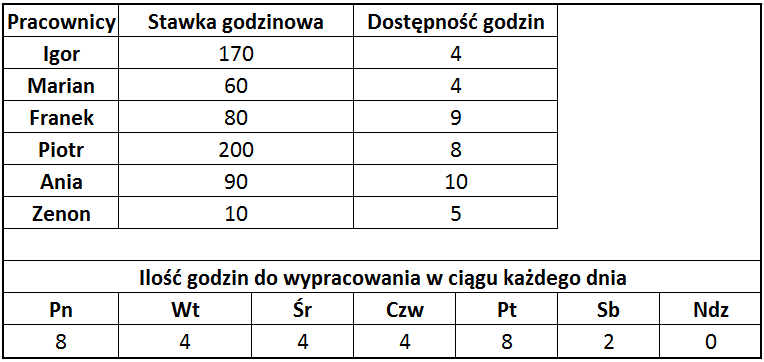



In [1]:
# Rozwiązanie problemu.

# Import bibliotek używanych do rozwiązania problemu.
from pulp import *
import pandas as pd
# Tworzenie problemu i jego minimalizacja.
prob = LpProblem("Scheduling problem", LpMinimize)

# Zmienne związane z problemem.
dni = ["Poniedziałek", "Wtorek", "Środa", "Czwartek", "Piątek", "Sobota", "Niedziela"]
osoby = ["Igor", "Marcin", "Franek", "Piotr", "Ania", "Zenon"]
stawka = [170,60,80,200,90,10] # Stawka godzinowa osób.
dostepnosc = [4,4,9,8,10,5] # Dostępność godzin osób tygodniowo.
godzinyOtwarcia = [8,4,4,4,8,2,0] # Ilość godzin do wypracowania w ciągu każdego dnia.

# Tworzenie słownika "GodzinyPracy" gdzie kluczami są imiona osób.
GodzinyPracy = {}
for imie in osoby:
    GodzinyPracy[imie] = {}

# Tworzenie słownika "Dostepnosc", który zawiera jako klucz imiona, a wartościami są godziny dostępności danej osoby.
# Stworzenie zagnieżdżonego słownika "GodzinyPracy" o dodanie dla każdej osoby dni tygodnia,
# dla których wartościami są godziny pracujące. 
Dostepnosc ={}
i = 0
for imie in osoby:
    Dostepnosc[imie] = LpVariable("Godziny_dostepnosci_" + imie, 0)
    prob += Dostepnosc[imie] == dostepnosc[i]
    for dzien in dni:
        GodzinyPracy[imie][dzien] = LpVariable("Godziny_pracujace_" + imie + "-" + dzien, 0)
    i +=1

# Tworzenie słownika "GodzinyOtwarcia", którego kluczami są dni, a wartościami godziny otwarcia w dany dzień.
GodzinyOtwarcia ={}
i = 0
for dzien in dni:
    GodzinyOtwarcia[dzien] = LpVariable("Godziny_otwarcia_w_" + dzien, 0)
    prob += GodzinyOtwarcia[dzien] == godzinyOtwarcia[i]
    suma = 0
    for imie in osoby:
        suma += GodzinyPracy[imie][dzien] # Sumowanie godzin pracy osób z danego dnia.
    prob += suma == GodzinyOtwarcia[dzien]
    i +=1

# Sumowanie godzin pracy osób z danego dnia oraz dodanie ograniczeń dostępności.              
for imie in osoby:
    zmienna = 0
    for dzien in dni:
        zmienna += GodzinyPracy[imie][dzien]
    prob += zmienna <= Dostepnosc[imie]


zmienna1 = 0
zmienna2 = 0
# Sumowanie godzin otwarcia z każdego dnia.
for dzien in dni:
    zmienna1 += GodzinyOtwarcia[dzien]

    
for dzien in dni:
    suma = 0
    for imie in osoby:
        suma += GodzinyPracy[imie][dzien]
    zmienna2 += suma    
prob += zmienna1 == zmienna2

i = 0
pensjaCala = 0
for imie in osoby:
    for dzien in dni:
        pensjaCala += GodzinyPracy[imie][dzien] * stawka[i]
    i += 1

prob += pensjaCala

# Rozwiązywanie problemu.
prob.solve()
# Wyświetlenie statusu problemu.
print("Status:", LpStatus[prob.status])

# Tworzenie tabeli na podstawie uzyskanych wyników.
slownik = {}
for v in prob.variables():
        slownik[v.name]=v.varValue

tabela =[]
tabImie = []
print(""" Pon   Wt   Śr  Cz   Pt   Sob   Nd""")
for imie in osoby:
    for dzien in dni:
        if f"Godziny_pracujace_{imie}_{dzien}" in slownik:
            tabela.append(slownik[f"Godziny_pracujace_{imie}_{dzien}"])
    print(tabela,imie)
    tabela = []
            
# Na podstawie uzyskanych wyników wyświetlenie najniższych kosztów utrzymania pracowników.           

print("\nNajniższy koszt utrzymania pracowników {} zł.  ".format( value(prob.objective)))


Status: Optimal
 Pon   Wt   Śr  Cz   Pt   Sob   Nd
[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] Igor
[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] Marcin
[1.0, 0.0, 4.0, 0.0, 2.0, 2.0, 0.0] Franek
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] Piotr
[0.0, 0.0, 0.0, 4.0, 6.0, 0.0, 0.0] Ania
[1.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0] Zenon

Najniższy koszt utrzymania pracowników 2250.0 zł.  


c:\users\msi\appdata\local\programs\python\python38-32\lib\site-packages\pulp\pulp.py:1137: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
